## Drifters and Cmems data Notebook

### Introduction
This notebook's main purpose is to plot the drifter's trajectory over a SSH (Sea Surface Height) field for the period, then over a SST (Sea Surface Temperature) field. Time series of u (drifter) and ugeos on the same figure. Similarly with v and vgeo.

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Data Product: Global Drifter Program Current of NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 136
  - https://erddap.aoml.noaa.gov/gdp/erddap/tabledap/drifter_6hour_qc.html
  - period :  2023-03-30 to 2023-07-09

- CMEMS Data:
  - Source: Copernicus Marine, Satellite L4, Temporal resolution: Every 24 hours, Spatial resolution: 0.25°*0.25°
  - Data Product: SEALEVEL_GLO_PHY_L4_MY_008_047
  - link :  https://doi.org/10.48670/moi-00148
  - download data : ahttps://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_MY_008_047/download
  - Periode : period :  2023-03-30 to 2023-07-09
  - DUACS is the operationnal multimission production system of altimeter data developed by CNES/CLS. It features multimission products based on all altimetry satellites from GEOSAT to Jason-3 for a total of 100 years of cumulated data.


### Tasks

#### 1. Visualization of the drifter's trajectory and the SSH (Sea Surface Height).
- Plotting the drifter's trajectory over a SSH field for a specific period.
- Plotting the drifter's trajectory over a SSH field and the mean SSH field over time.

#### 2. Visualization of the drifter's trajectory and the SST (Sea Surface Temperature).
- Plotting the drifter's trajectory over a SST field for a specific period.
- Plotting the drifter's trajectory over a Sea Surface Temperature (SST) field averaged over time.

#### 3. Visualization of the time series of drifter velocities and CMEMS (Copernicus Marine Environment Monitoring Service) velocities.
- Plotting time series of u (drifter) and ugeos on the same figure.
- Plotting time series of v (drifter) and vgeos on the same figure.

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

## 1. Visualization of the drifter's trajectory and the SSH (Sea Surface Height).

### - Plotting the drifter's trajectory over a SSH field for a specific period.

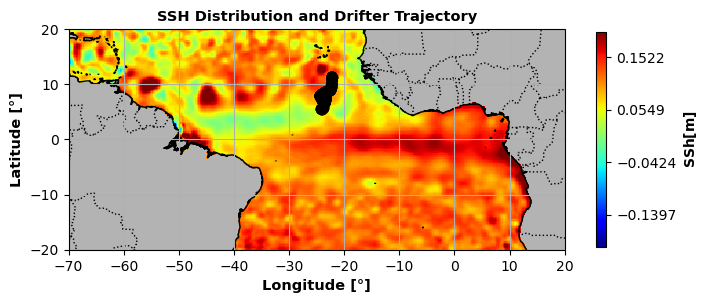

In [10]:
# Load the netCDF file containing SSH
ssh_data = xr.open_dataset('ssh.nc')

# Extract necessary variables (longitude, latitude, time, and SSH)
lon = ssh_data['longitude']
lat = ssh_data['latitude']
time = ssh_data['time']
sla = ssh_data['sla']

# Choose the nearest time to the desired time
selected_time = '2023-03-30T00:00:00.000000000'
nearest_time = time.sel(time=selected_time, method='nearest')

# Create the SSH map using pcolormesh
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
pcm = plt.pcolormesh(lon, lat, sla.sel(time=nearest_time), cmap='jet', vmin=-0.2, vmax=0.2, transform=ccrs.PlateCarree())

ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='0.7', edgecolor='k')

# Specify colorbar limits based on actual SSH values
sla_min = sla.sel(time=nearest_time).min().values
sla_max = sla.sel(time=nearest_time).max().values
plt.colorbar(pcm, label=r'$\mathbf{SSh [m]}$', orientation='vertical', shrink=0.7, ticks=np.linspace(sla_min, sla_max, 8))

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds.longitude.values
drifter_lat = ds.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[22657:23061], drifter_lat[22657:23061], color='black',marker='o',linestyle='-', transform=ccrs.PlateCarree())
 
# Specify axes limits and ticks
plt.xlim(-70, 20)  # Longitude axis from 70W to 20E
plt.ylim(-20, 20)  # Latitude axis from 20S to 20N
plt.xticks(np.arange(-70, 30, 10))  # Longitude ticks every 10 degrees
plt.yticks(np.arange(-20, 30, 10))  # Latitude ticks every 10 degrees

# Title and axes labels
plt.title('SSH Distribution and Drifter Trajectory', fontsize=10.5, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.savefig("fig31 mode.png")
plt.show()

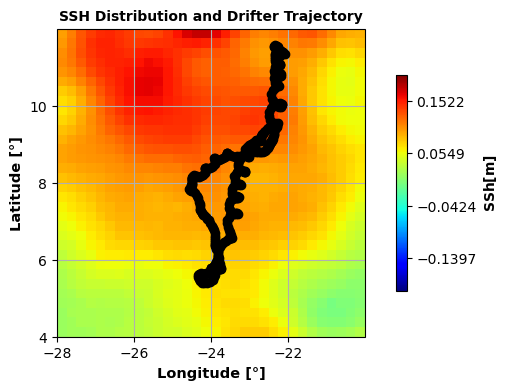

In [11]:
# Load the netCDF file containing SSH
ssh_data = xr.open_dataset('ssh.nc')

# Extract necessary variables (longitude, latitude, time, and SSH)
lon = ssh_data['longitude']
lat = ssh_data['latitude']
time = ssh_data['time']
sla = ssh_data['sla']

# Choose the nearest time to the desired time
selected_time = '2023-03-30T00:00:00.000000000'
nearest_time = time.sel(time=selected_time, method='nearest')

# Create the SSH map using pcolormesh
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
pcm = plt.pcolormesh(lon, lat, sla.sel(time=nearest_time), cmap='jet', vmin=-0.2, vmax=0.2, transform=ccrs.PlateCarree())

ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='0.7', edgecolor='k')

# Specify colorbar limits based on actual SSH values
sla_min = sla.sel(time=nearest_time).min().values
sla_max = sla.sel(time=nearest_time).max().values
plt.colorbar(pcm, label=r'$\mathbf{SSh [m]}$' , orientation='vertical', shrink=0.7, ticks=np.linspace(sla_min, sla_max, 8))

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds.longitude.values
drifter_lat = ds.latitude.values

# Plot drifter trajectory with scatter
# plt.scatter(drifter_lon[19674:19931], drifter_lat[19674:19931], color='white', s=5, transform=ccrs.PlateCarree())
plt.plot(drifter_lon[22657:23061], drifter_lat[22657:23061], color='black',marker='o',linestyle='-', transform=ccrs.PlateCarree())
 
# Specify axes limits and ticks
plt.xlim(-28, -20)  # Longitude axis from 70W to 20E
plt.ylim(4, 12)  # Latitude axis from 20S to 20N
plt.xticks(np.arange(-28,-20, 2))  # Longitude ticks every 10 degrees
plt.yticks(np.arange(4, 12, 2))  # Latitude ticks every 10 degrees

# Title and axes labels
plt.title('SSH Distribution and Drifter Trajectory', fontsize=10, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.savefig("fig41 mode.png")
plt.show()

### - Plotting the drifter's trajectory over a SSH field and the mean SSH field over time.

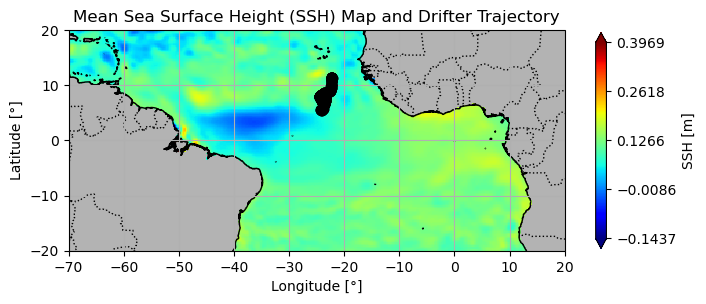

In [4]:
# Load the netCDF file containing SSH
ssh_data = xr.open_dataset('ssh.nc')

# Extract necessary variables (longitude, latitude, time, and SSH)
lon = ssh_data['longitude']
lat = ssh_data['latitude']
time = ssh_data['time']
sla = ssh_data['sla']

# Calculate the mean SSH over time
mean_sla = sla.mean(dim='time')

# Create the map of mean SSH using pcolormesh
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
pcm = plt.pcolormesh(lon, lat, mean_sla, cmap='jet', transform=ccrs.PlateCarree())

ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='0.7', edgecolor='k')

# Specify colorbar limits based on actual SSH values
sla_min = mean_sla.min().values
sla_max = mean_sla.max().values
plt.colorbar(pcm, label='SSH [m]', extend='both', orientation='vertical', shrink=0.7, ticks=np.linspace(sla_min, sla_max, 5))

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds.longitude.values
drifter_lat = ds.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[22657:23061], drifter_lat[22657:23061], color='black',marker='o',linestyle='-', transform=ccrs.PlateCarree())
 
# Specify axes limits and ticks
plt.xlim(-70, 20)  # Longitude axis from 70W to 20E
plt.ylim(-20, 20)  # Latitude axis from 20S to 20N
plt.xticks(np.arange(-70, 30, 10))  # Longitude ticks every 10 degrees
plt.yticks(np.arange(-20, 30, 10))  # Latitude ticks every 10 degrees

# Add axes labels
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.title('Mean Sea Surface Height (SSH) Map and Drifter Trajectory')
plt.savefig("fig32 mode.png")
plt.show()

## 2. Visualization of the drifter's trajectory and the SST (Sea Surface Temperature).

### - Plotting the drifter's trajectory over a SST field for a specific period.

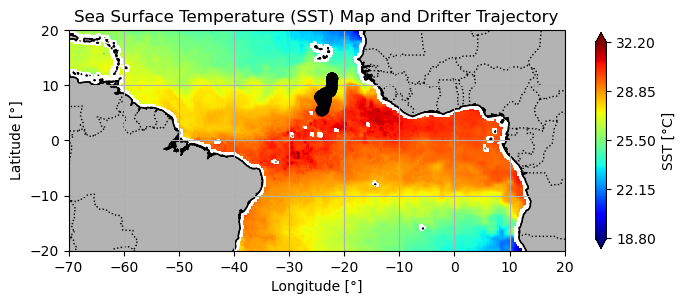

In [5]:
# Load the netCDF file containing SST
sst_data = xr.open_dataset('sst_sss.nc')

# Extract necessary variables (longitude, latitude, time, and SST)
lon = sst_data['longitude']
lat = sst_data['latitude']
time = sst_data['time']
sst = sst_data['sst']

# Choose the nearest time to the desired time
selected_time = '2023-03-30T00:00:00.000000000'
nearest_time = time.sel(time=selected_time, method='nearest')

# Create the SST map using pcolormesh
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
pcm = plt.pcolormesh(lon, lat, sst.sel(time=nearest_time), cmap='jet', transform=ccrs.PlateCarree())

ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='0.7', edgecolor='k')

# Specify colorbar limits based on actual SST values
sst_min = sst.sel(time=nearest_time).min().values
sst_max = sst.sel(time=nearest_time).max().values
plt.colorbar(pcm, label='SST [°C]', extend='both', orientation='vertical', shrink=0.7, ticks=np.linspace(sst_min, sst_max, 5))

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds.longitude.values
drifter_lat = ds.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[22657:23061], drifter_lat[22657:23061], color='black',marker='o',linestyle='-', transform=ccrs.PlateCarree())
 
# Specify axes limits and ticks
plt.xlim(-70, 20)  # Longitude axis from 70W to 20E
plt.ylim(-20, 20)  # Latitude axis from 20S to 20N
plt.xticks(np.arange(-70, 30, 10))  # Longitude ticks every 10 degrees
plt.yticks(np.arange(-20, 30, 10))  # Latitude ticks every 10 degrees

# Title and axes labels
plt.title('Sea Surface Temperature (SST) Map and Drifter Trajectory')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.savefig("fig33 mode.png")
plt.show()

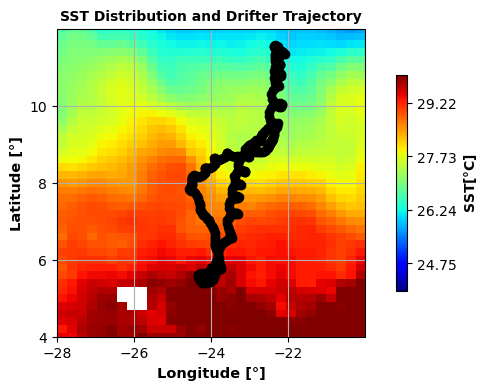

In [22]:
# Load the netCDF file containing SST
sst_data = xr.open_dataset('sst_sss.nc')

# Extract necessary variables (longitude, latitude, time, and SST)
lon = sst_data['longitude']
lat = sst_data['latitude']
time = sst_data['time']
sst = sst_data['sst']

# Choose the nearest time to the desired time
selected_time = '2023-03-30T00:00:00.000000000'
nearest_time = time.sel(time=selected_time, method='nearest')

# Create the SST map using pcolormesh
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
pcm = plt.pcolormesh(lon, lat, sst.sel(time=nearest_time), cmap='jet', vmin=24, vmax=30, transform=ccrs.PlateCarree())

ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='0.7', edgecolor='k')

# Specify colorbar limits based on actual SST values
sst_min = sst.sel(time=nearest_time).min().values
sst_max = sst.sel(time=nearest_time).max().values
plt.colorbar(pcm, label=r'$\mathbf{SST [°C]}$', orientation='vertical', shrink=0.7, ticks=np.linspace(sst_min, sst_max, 10))

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds=xr.open_dataset(fn);

# Extract drifter coordinates and variables
 
drifter_lon = ds.longitude.values
drifter_lat = ds.latitude.values
 
# Plot drifter trajectory with scatter
# plt.scatter(drifter_lon[19674:19931], drifter_lat[19674:19931], color='white', s=5, transform=ccrs.PlateCarree())
plt.plot(drifter_lon[22657:23061], drifter_lat[22657:23061], color='black',marker='o',linestyle='-', transform=ccrs.PlateCarree())
 
# Specify axes limits and ticks
plt.xlim(-28, -20)  # Longitude axis from 70W to 20E
plt.ylim(4, 12)  # Latitude axis from 20S to 20N
plt.xticks(np.arange(-28,-20, 2))  # Longitude ticks every 10 degrees
plt.yticks(np.arange(4, 12, 2))  # Latitude ticks every 10 degrees

# Title and axes labels
plt.title('SST Distribution and Drifter Trajectory', fontsize=10, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.savefig("fig44 mode.png")
plt.show()

### - Plotting the drifter's trajectory over a Sea Surface Temperature (SST) field averaged over time.

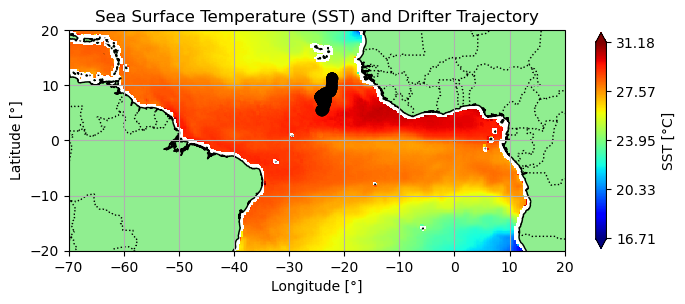

In [7]:
# Load the netCDF file containing SST
sst_data = xr.open_dataset('sst_sss.nc')

# Extract necessary variables (longitude, latitude, time, and SST)
lon = sst_data['longitude']
lat = sst_data['latitude']
time = sst_data['time']
sst = sst_data['sst']

# Calculate the mean SST over time
mean_sst = sst.mean(dim='time')

# Create the map of mean SST using pcolormesh
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
pcm = plt.pcolormesh(lon, lat, mean_sst, cmap='jet', transform=ccrs.PlateCarree())

ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgreen')

# Specify colorbar limits based on actual SST values
sst_min = mean_sst.min().values
sst_max = mean_sst.max().values
plt.colorbar(pcm, label='SST [°C]', extend='both', orientation='vertical', shrink=0.7, ticks=np.linspace(sst_min, sst_max, 5))

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds=xr.open_dataset(fn);

# Extract drifter coordinates and variables
 
drifter_lon = ds.longitude.values
drifter_lat = ds.latitude.values
time = ds.time.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[22657:23061], drifter_lat[22657:23061], color='black',marker='o',linestyle='-', transform=ccrs.PlateCarree())

# Specify axes limits and ticks
plt.xlim(-70, 20)  # Longitude axis from 70W to 20E
plt.ylim(-20, 20)  # Latitude axis from 20S to 20N
plt.xticks(np.arange(-70, 30, 10))  # Longitude ticks every 10 degrees
plt.yticks(np.arange(-20, 30, 10))  # Latitude ticks every 10 degrees

# Add axes labels
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Sea Surface Temperature (SST) and Drifter Trajectory')
plt.grid(True)
plt.savefig("fig34 mode.png")
plt.show()

## 3. Visualization of the time series of drifter velocities and CMEMS (Copernicus Marine Environment Monitoring Service) velocities.

### - Plotting time series of u (drifter) and ugeos on the same figure.

### - Plotting time series of v (drifter) and vgeos on the same figure.

### -  See notebook 3-interpolation-cmems-drifters-new.ipynb